**Proyecto Machine Learning Techniques.**

**Objectivo**

Comparar resultados de clasificación con tecnicas de machine learning y redes neuronales.

Usaremos:
1.   Random Forest
2.   SVM
3.   Redes neuronales

**Tareas Pendientes**

Depuración de DataSet 
- Multiples f 
- Min Max
- Información binaria que no aporta 

**Entrega 2 (Semana examen finales).**

Entregables:

*   Se debe entregar un documento estilo paper del proyecto.
*   Código fuente del proyecto (notebooks) con una guía de entrenamiento y posterior ejecución.
*   Demostración/despliegue de su modelo en aplicación.
*   Video de 10 min explicando su proyecto.
*   Sustentación presencial en horarios a convenir. 



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, callbacks

# Procesamiento de datos


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLT/Proyecto/Descriptores_titled.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,138,139,140,141,142,143,147,148,149,150,151,152,165,166,167,168,169,170,174,175,176,177,178,179,183,184,185,186,187,188,191,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,214,215,219,220,221,222,223,224,228,229,230,231,232,233,236,237,238,239,240,241,242,243,244,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,344,345,346,347,348,354,355,356,357,358,359,363,364,365,366,367,368,381,382,383,384,385,386,390,391,392,393,394,395,399,400,401,402,403,404,407,408,409,410,411,412,413,416,417,418,419,420,421,422,425,426,427,428,429,430,431,435,436,437,438,439,440,444,445,446,447,448,449,452,453,454,455,460,461,462,463,464,465,468,469,470,471,472,473,484,485,486,487,488,489,492,493,494,495,496,497,500,501,502,503,504

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28422 entries, 0 to 28421
Columns: 1829 entries, Unnamed: 0 to mZagreb2
dtypes: bool(2), float64(369), int64(320), object(1138)
memory usage: 396.2+ MB


In [9]:
df.keys()

Index(['Unnamed: 0', 'IUPAC', 'SMILES', 'ABC', 'ABCGG', 'nAcid', 'nBase',
       'SpAbs_A', 'SpMax_A', 'SpDiam_A',
       ...
       'SRW10', 'TSRW10', 'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2',
       'mZagreb1', 'mZagreb2'],
      dtype='object', length=1829)

In [10]:
df.describe()

Unnamed: 0           ABC         ABCGG         nAcid         nBase  \
count  28422.000000  28422.000000  28422.000000  28422.000000  28422.000000   
mean   14211.500000     17.819116     14.564138      0.146577      0.318802   
std     8204.869012      9.278709      6.384383      0.465304      0.763887   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7106.250000     11.646301     10.468861      0.000000      0.000000   
50%    14211.500000     16.251525     13.475412      0.000000      0.000000   
75%    21316.750000     21.477072     17.079237      0.000000      0.000000   
max    28422.000000    157.456843    112.312946     12.000000     10.000000   

          nAromAtom     nAromBond         nAtom    nHeavyAtom        nSpiro  \
count  28422.000000  28422.000000  28422.000000  28422.000000  28422.000000   
mean      10.130744     10.488108     42.217824     23.201886      0.037190   
std        7.004465      7.384477     23.193734     11.663870      0.225849   
min        0.000000      0.000000      3.000000      2.000000      0.000000   
25%        6.000000      6.000000     28.000000     16.000000      0.000000   
50%       11.000000     11.000000     37.000000     21.000000      0.000000   
75%       15.000000     16.000000     50.000000     28.000000      0.000000   
max       60.000000     60.000000    363.000000    198.000000      4.000000   

       ...         SRW09         SRW10        TSRW10            MW  \
count  ...  28422.000000  28422.000000  28422.000000  28422.000000   
mean   ...      3.073865      9.882706     63.291597    336.707968   
std    ...      3.541595      0.705133     17.411245    165.630496   
min    ...      0.000000      0.000000      3.000000     32.037448   
25%    ...      0.000000      9.462071     50.740748    229.029442   
50%    ...      0.000000      9.928960     60.941419    305.028400   
75%    ...      6.985642     10.336130     73.247643    400.204362   
max    ...      9.988242     12.434303    265.142450   3044.365284   

                AMW         WPath          WPol       Zagreb1       Zagreb2  \
count  28422.000000  2.842200e+04  28422.000000  28422.000000  28422.000000   
mean       8.331707  8.082387e+08     36.987017    119.991415    141.522377   
std        2.344010  8.962692e+09     24.624280     65.958100     82.376500   
min        4.568072  1.000000e+00      0.000000      0.000000      0.000000   
25%        7.143907  4.290000e+02     21.000000     76.000000     87.000000   
50%        7.958540  1.021000e+03     32.000000    108.000000    126.000000   
75%        8.978106  2.491000e+03     46.000000    146.000000    174.000000   
max      147.423454  9.408001e+11    373.000000   1104.000000   1340.000000   

           mZagreb2  
count  28422.000000  
mean       5.145180  
std        2.504507  
min        0.000000  
25%        3.527778  
50%        4.694444  
75%        6.111111  
max       43.111111  

[8 rows x 689 columns]

In [11]:
df.head()

Unnamed: 0                                              IUPAC  \
0           1                                               none   
1           2  [4-acetyloxy-6-[(3-acetyl-3,5,12-trihydroxy-6,...   
2           3  3-N,3-N,6-N,6-N,2,7-hexamethylacridine-3,6-dia...   
3           4  8-(4-chlorophenyl)-2,5,12,14-tetraoxatetracycl...   
4           5  N,N-dimethyl-3-[(1-nitroacridin-9-yl)amino]pro...   

                                              SMILES        ABC      ABCGG  \
0  c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[...  24.813097  18.208895   
1  c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(...  33.996964  26.437580   
2      n1c2c(cc(c(c2)N(C)C)C)cc2cc(c(cc12)N(C)C)C.Cl  17.384261  13.811612   
3      c12OCOc1cc3OC4=C(C(=O)OC4)C(c3c2)c5ccc(Cl)cc5  19.734689  15.746470   
4  c12c(c(ccc1)[N+](=O)[O-])c(c1c(n2)cccc1)NCCC[N...  19.544778  15.562493   

   nAcid  nBase                             SpAbs_A  \
0      0      1  multiple fragments (SpAbs_A/SpAbs)   
1      0      0                    53.6903926634875   
2      0      0  multiple fragments (SpAbs_A/SpAbs)   
3      0      0                   32.38598983881915   
4      0      1  multiple fragments (SpAbs_A/SpAbs)   

                              SpMax_A                              SpDiam_A  \
0  multiple fragments (SpMax_A/SpMax)  multiple fragments (SpDiam_A/SpDiam)   
1                   2.618130706764582                     5.236261413529162   
2  multiple fragments (SpMax_A/SpMax)  multiple fragments (SpDiam_A/SpDiam)   
3                   2.562597350786493                     5.069845102783232   
4  multiple fragments (SpMax_A/SpMax)  multiple fragments (SpDiam_A/SpDiam)   

   ...      SRW10     TSRW10          MW       AMW         WPath WPol Zagreb1  \
0  ...  10.780226  67.978243  480.150197  7.744358  3.000002e+09   56     178   
1  ...  11.042362  81.389250  600.164305  8.335615  5.856000e+03   88     240   
2  ...  10.206883  57.684293  329.165875  7.003529  2.200001e+09   39     120   
3  ...  10.385512  75.287853  342.029501  9.772271  1.177000e+03   42     140   
4  ...  10.239067  61.026129  376.130218  8.002771  2.500001e+09   40     132   

  Zagreb2                                        mZagreb1  mZagreb2  
0     220  divide by zero encountered in power (mZagreb1)  6.180556  
1     296                               17.67361111111111  9.111111  
2     144  divide by zero encountered in power (mZagreb1)  4.666667  
3     173                               6.111111111111111  5.027778  
4     154  divide by zero encountered in power (mZagreb1)  5.375000  

[5 rows x 1829 columns]

In [12]:
# remueve columnas llenas del mismo string o el mismo numero
for column in df:
  if column == 'SMILES':
    continue
  if df[column].dtype == 'object':
    if df[column].describe()['unique']==1:
      print(column, 'Same String')
      df = df.drop(column, axis=1)
      continue
    else:
      print(column, 'Some Strings, converting')
      df[column] = pd.to_numeric(df[column],errors='coerce')
      df = df.replace(np.nan, 0, regex=True)
      df[column] = df[column].astype(float)
  if df[column].dtype == 'int64' or df[column].dtype == 'float64':
    if df[column].min() == df[column].max():
      print(column, 'Same Number')
      df = df.drop(column, axis=1)

IUPAC Some Strings, converting
IUPAC Same Number
SpAbs_A Some Strings, converting
SpMax_A Some Strings, converting
SpDiam_A Some Strings, converting
SpAD_A Some Strings, converting
SpMAD_A Some Strings, converting
LogEE_A Some Strings, converting
VE1_A Some Strings, converting
VE2_A Some Strings, converting
VE3_A Some Strings, converting
VR1_A Some Strings, converting
VR2_A Some Strings, converting
VR3_A Some Strings, converting
ATS0s Some Strings, converting
ATS1s Some Strings, converting
ATS2s Some Strings, converting
ATS3s Some Strings, converting
ATS4s Some Strings, converting
ATS5s Some Strings, converting
ATS6s Some Strings, converting
ATS7s Some Strings, converting
ATS8s Some Strings, converting
ATS0se Some Strings, converting
ATS1se Some Strings, converting
ATS2se Some Strings, converting
ATS3se Some Strings, converting
ATS4se Some Strings, converting
ATS5se Some Strings, converting
ATS6se Some Strings, converting
ATS7se Some Strings, converting
ATS8se Some Strings, converting


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28422 entries, 0 to 28421
Columns: 1493 entries, Unnamed: 0 to mZagreb2
dtypes: bool(2), float64(1245), int64(245), object(1)
memory usage: 323.4+ MB


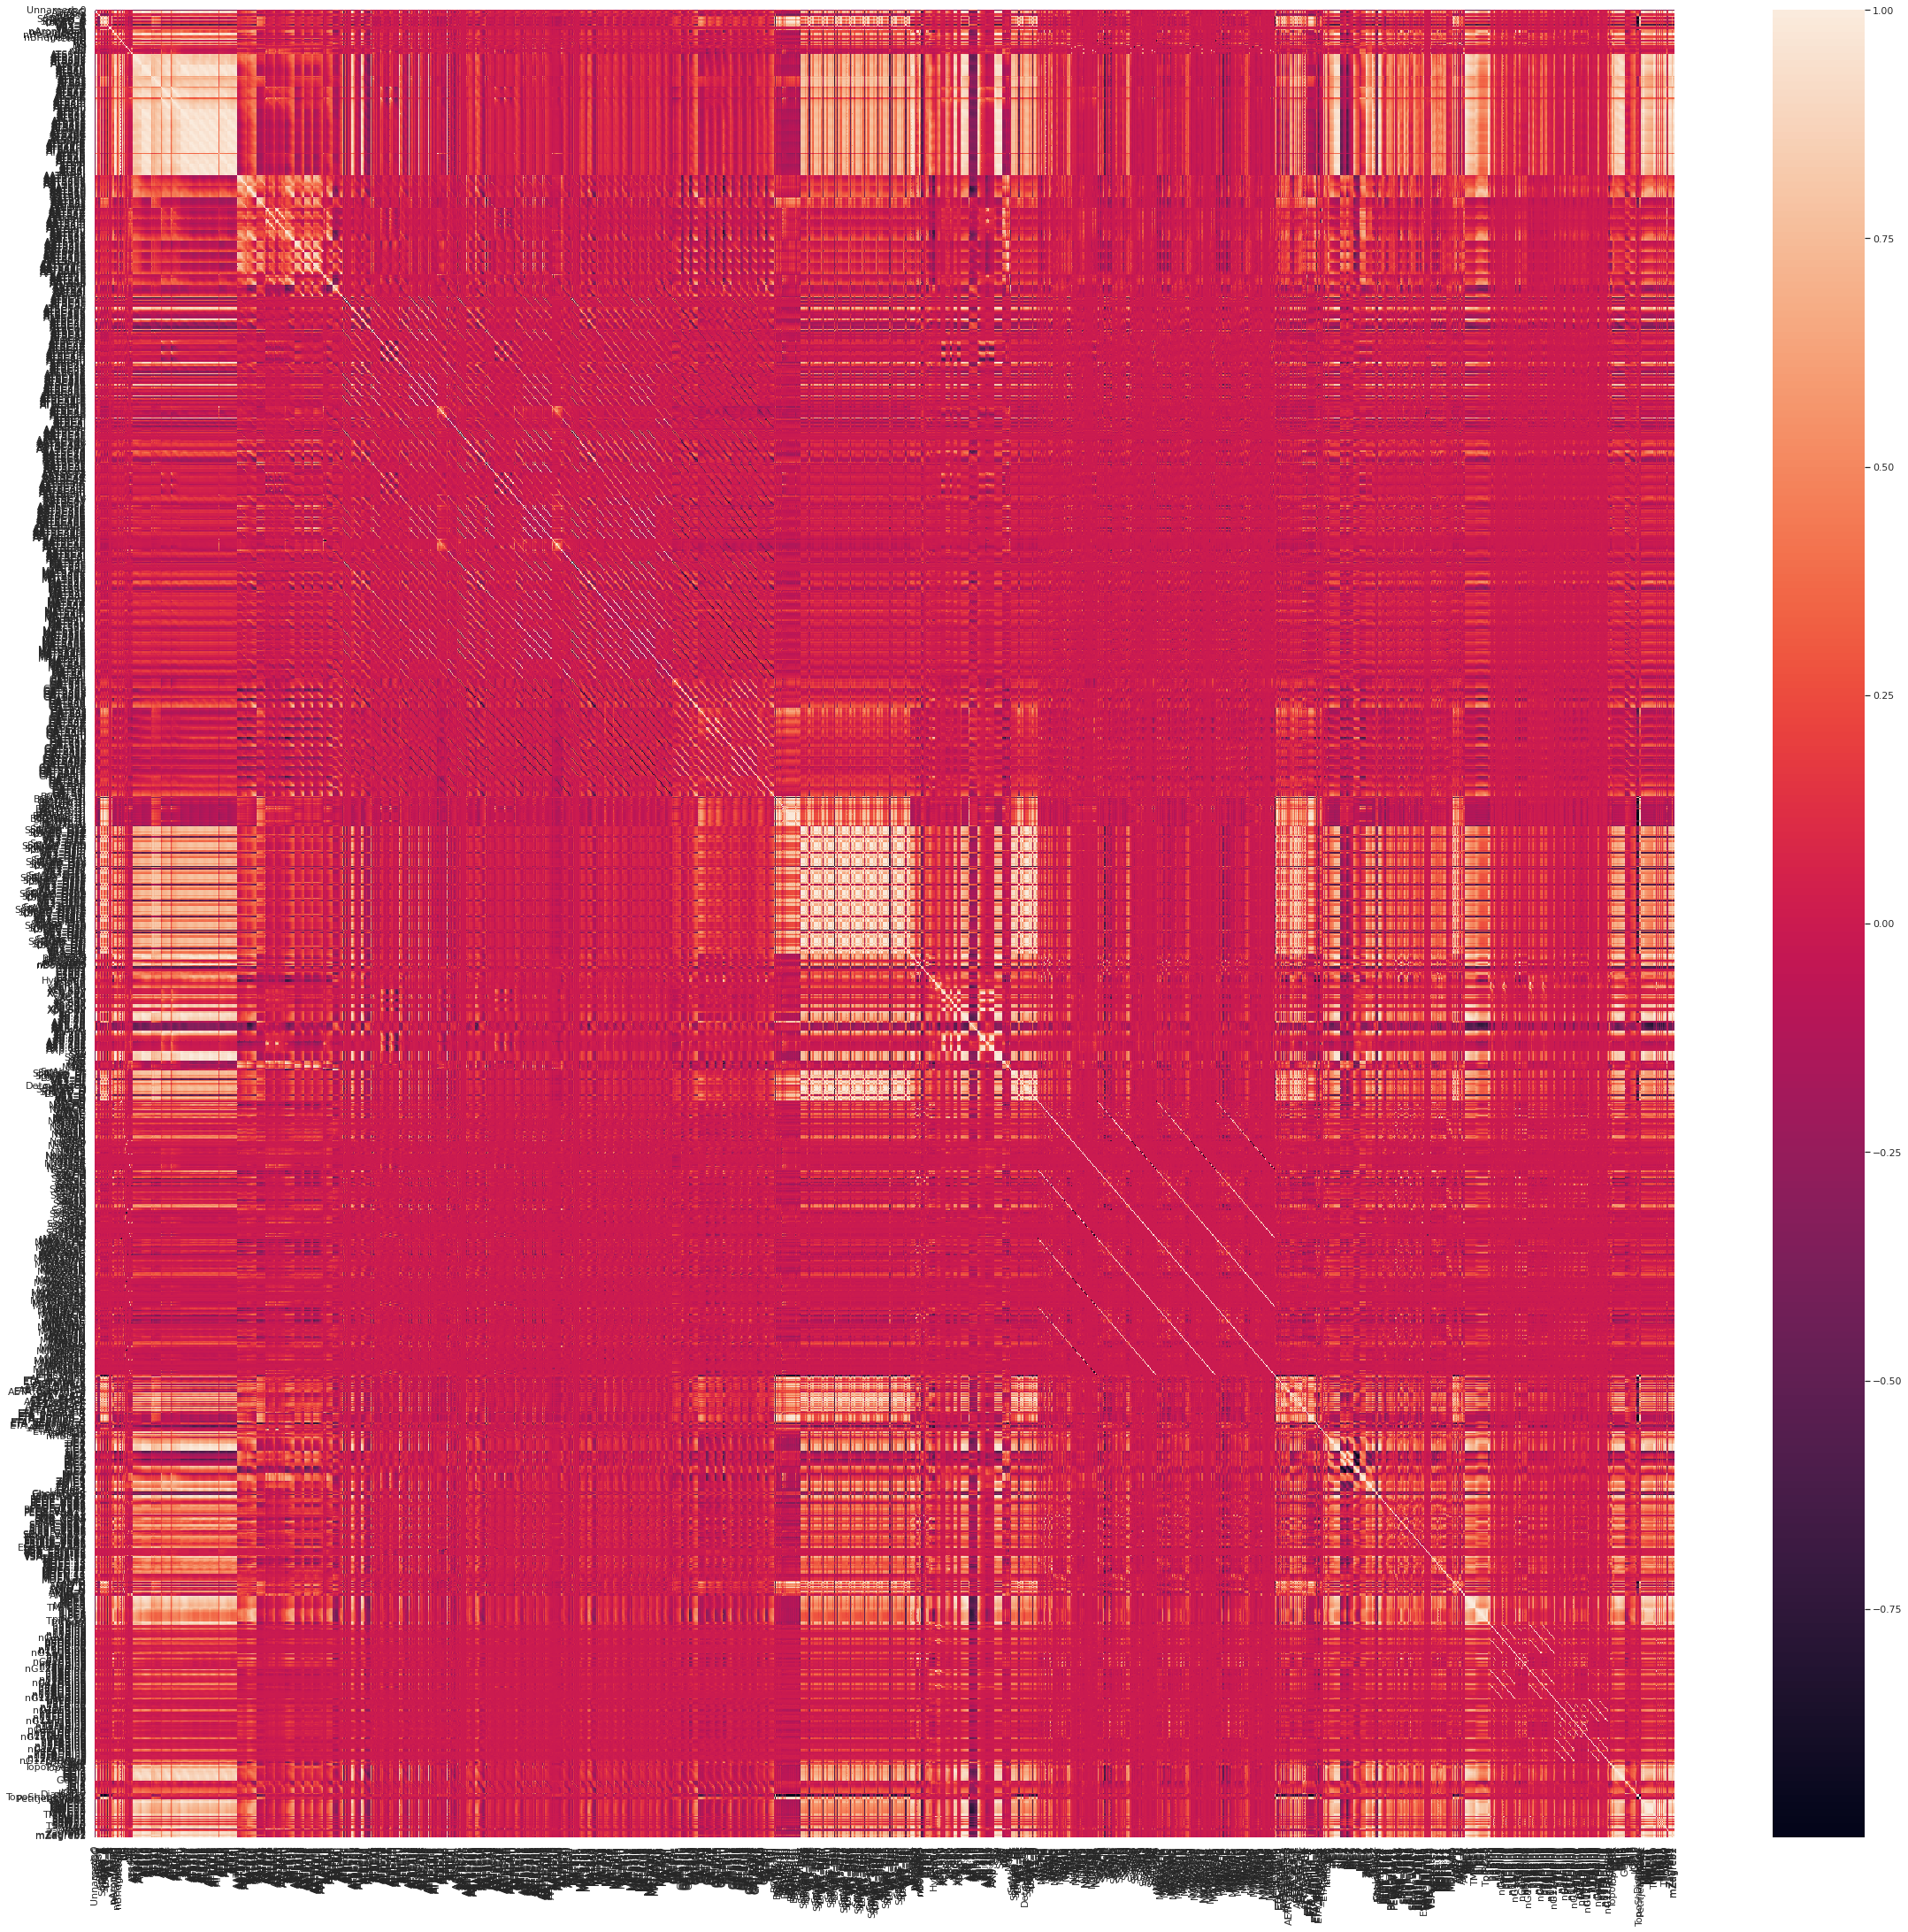

In [14]:
corr = df.corr()

sns.set(rc={'figure.figsize':(40,38)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [15]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

<ipython-input-15-020474cb1466>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


['ABCGG',
 'SpDiam_A',
 'SpAD_A',
 'SpMAD_A',
 'LogEE_A',
 'VE1_A',
 'VR2_A',
 'nAromBond',
 'nHeavyAtom',
 'nH',
 'nC',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS2s',
 'ATS4s',
 'ATS5s',
 'ATS6s',
 'ATS7s',
 'ATS8s',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe',
 'ATS6pe',
 'ATS7pe',
 'ATS8pe',
 'ATS0are',
 'ATS1are',
 'ATS2are',
 'ATS3are',
 'ATS4are',
 'ATS5are',
 'ATS6are',
 'ATS7are',
 'ATS8are',
 'ATS1p',
 'ATS2p',
 'ATS3p',
 'ATS4p',
 'ATS5p',
 'ATS6p',
 'ATS7p',
 'ATS8p',
 'ATS

In [16]:
df = df.drop(df[to_drop], axis=1)
df = df.drop(df[corr[np.isnan(corr['ABC'])].index], axis=1)
df = df.drop('Unnamed: 0', axis=1)

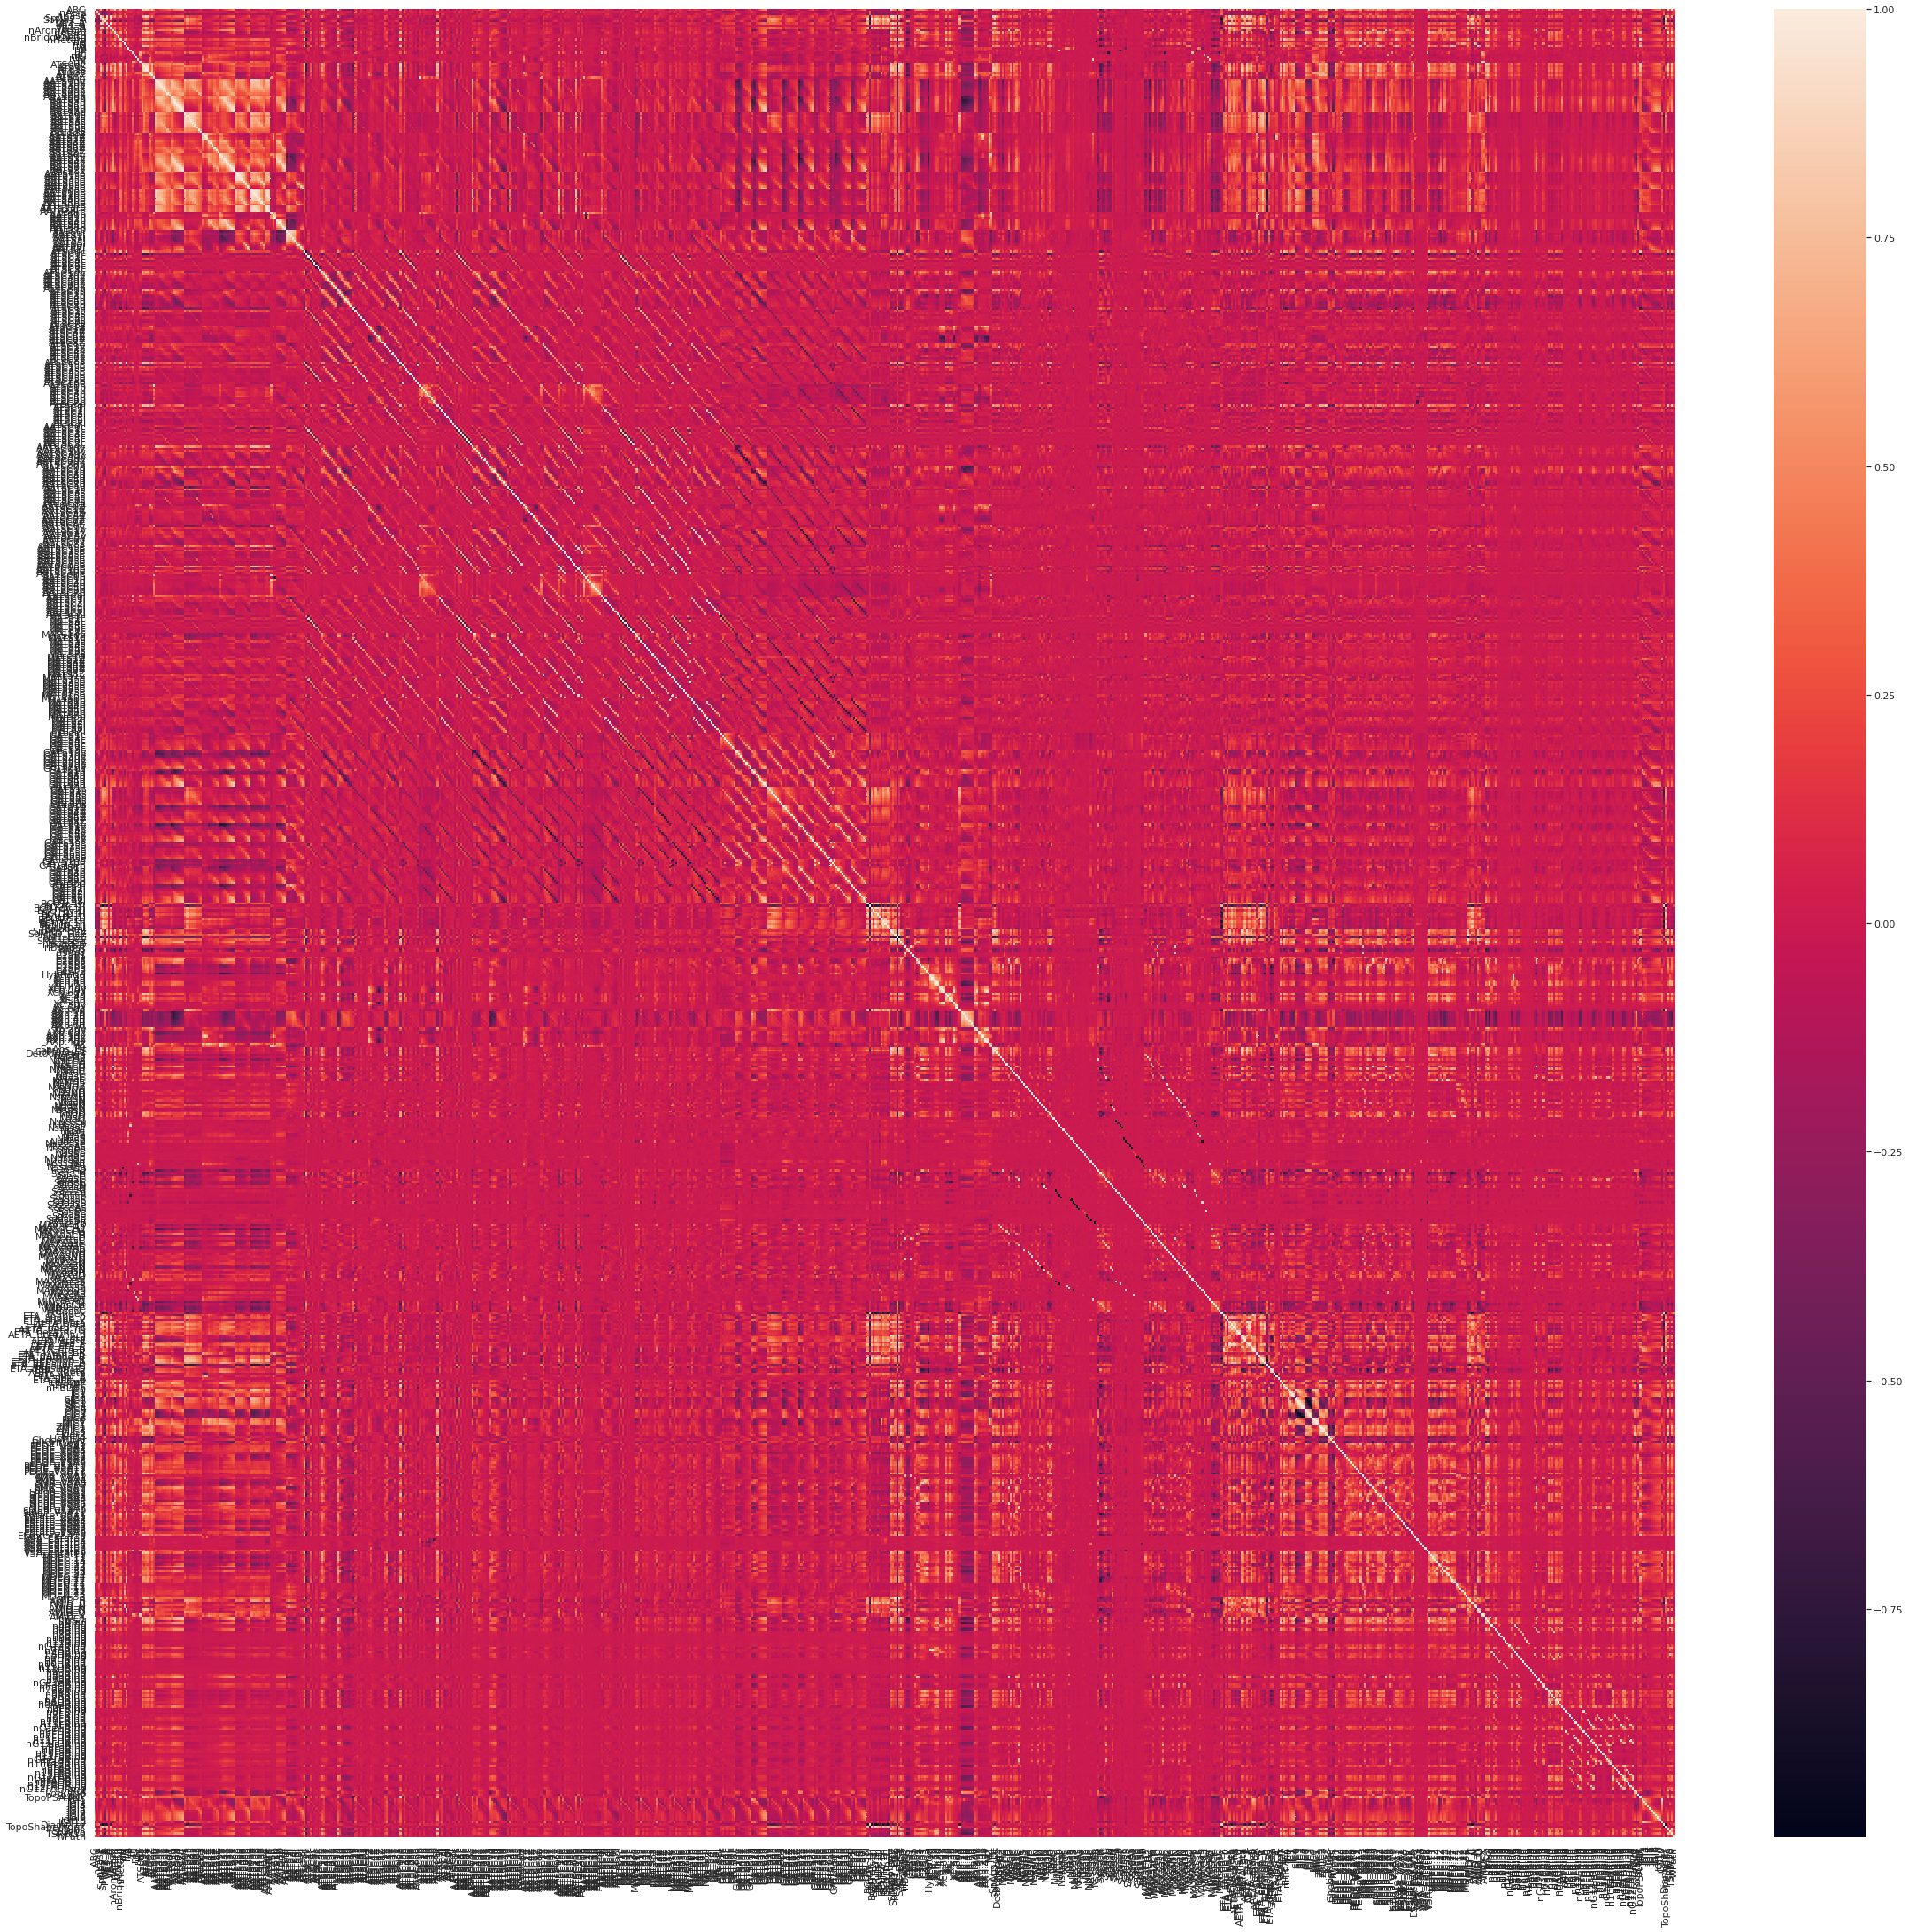

In [17]:
corr = df.corr()

sns.set(rc={'figure.figsize':(40,38)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28422 entries, 0 to 28421
Columns: 809 entries, SMILES to WPath
dtypes: bool(2), float64(648), int64(158), object(1)
memory usage: 175.0+ MB


In [20]:
df_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLT/Proyecto/updated_cancer_activity_nci60_data.csv')

In [21]:
df_labels.head()

SMILES  Activity
0           n1(c(nc2c(c1=O)CN(C(=O)CN2)c1ccccc1)OC)C  Inactive
1              N(C(=O)C=CC(=O)O)c1ccccc1[N+](=O)[O-]  Inactive
2  c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[...    Active
3                 c1ccc2c(c1)[nH]cc2C[C@@H](N)C(=O)O  Inactive
4  c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(...    Active

In [22]:
df_labels = df_labels.replace('Active',1)
df_labels = df_labels.replace('Inactive',0)

In [23]:
df_labels.head()

SMILES  Activity
0           n1(c(nc2c(c1=O)CN(C(=O)CN2)c1ccccc1)OC)C         0
1              N(C(=O)C=CC(=O)O)c1ccccc1[N+](=O)[O-]         0
2  c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[...         1
3                 c1ccc2c(c1)[nH]cc2C[C@@H](N)C(=O)O         0
4  c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(...         1

In [24]:
df = df.set_index('SMILES').join(df_labels.set_index('SMILES'))

In [25]:
df.head()

ABC  nAcid  nBase  \
SMILES                                                                        
c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C...  24.813097      0      1   
c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(=...  33.996964      0      0   
n1c2c(cc(c(c2)N(C)C)C)cc2cc(c(cc12)N(C)C)C.Cl       17.384261      0      0   
c12OCOc1cc3OC4=C(C(=O)OC4)C(c3c2)c5ccc(Cl)cc5       19.734689      0      0   
c12c(c(ccc1)[N+](=O)[O-])c(c1c(n2)cccc1)NCCC[N+...  19.544778      0      1   

                                                      SpAbs_A   SpMax_A  \
SMILES                                                                    
c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C...   0.000000  0.000000   
c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(=...  53.690393  2.618131   
n1c2c(cc(c(c2)N(C)C)C)cc2cc(c(cc12)N(C)C)C.Cl        0.000000  0.000000   
c12OCOc1cc3OC4=C(C(=O)OC4)C(c3c2)c5ccc(Cl)cc5       32.385990  2.562597   
c12c(c(ccc1)[N+](=O)[O-])c(c1c(n2)cccc1)NCCC[N+...   0.000000  0.000000   

                                                       VE2_A     VE3_A  \
SMILES                                                                   
c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C...  0.000000  0.000000   
c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(=...  0.116370  3.068833   
n1c2c(cc(c(c2)N(C)C)C)cc2cc(c(cc12)N(C)C)C.Cl       0.000000  0.000000   
c12OCOc1cc3OC4=C(C(=O)OC4)C(c3c2)c5ccc(Cl)cc5       0.181168  2.345191   
c12c(c(ccc1)[N+](=O)[O-])c(c1c(n2)cccc1)NCCC[N+...  0.000000  0.000000   

                                                          VR1_A     VR3_A  \
SMILES                                                                      
c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C...     0.000000  0.000000   
c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(=...  1160.604271  8.515311   
n1c2c(cc(c(c2)N(C)C)C)cc2cc(c(cc12)N(C)C)C.Cl          0.000000  0.000000   
c12OCOc1cc3OC4=C(C(=O)OC4)C(c3c2)c5ccc(Cl)cc5        191.710584  6.131456   
c12c(c(ccc1)[N+](=O)[O-])c(c1c(n2)cccc1)NCCC[N+...     0.000000  0.000000   

                                                    nAromAtom  ...      JGI9  \
SMILES                                                         ...             
c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C...         10  ...  0.009661   
c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(=...         12  ...  0.011312   
n1c2c(cc(c(c2)N(C)C)C)cc2cc(c(cc12)N(C)C)C.Cl              14  ...  0.022250   
c12OCOc1cc3OC4=C(C(=O)OC4)C(c3c2)c5ccc(Cl)cc5              12  ...  0.015546   
c12c(c(ccc1)[N+](=O)[O-])c(c1c(n2)cccc1)NCCC[N+...         14  ...  0.014347   

                                                       JGI10     JGT10  \
SMILES                                                                   
c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C...  0.006173  0.460849   
c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(=...  0.009832  0.547818   
n1c2c(cc(c(c2)N(C)C)C)cc2cc(c(cc12)N(C)C)C.Cl       0.000000  0.564836   
c12OCOc1cc3OC4=C(C(=O)OC4)C(c3c2)c5ccc(Cl)cc5       0.010000  0.415194   
c12c(c(ccc1)[N+](=O)[O-])c(c1c(n2)cccc1)NCCC[N+...  0.006173  0.468056   

                                                     Diameter  TopoShapeIndex  \
SMILES                                                                          
c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C...  100000000             0.0   
c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(=...         16             1.0   
n1c2c(cc(c(c2)N(C)C)C)cc2cc(c(cc12)N(C)C)C.Cl       100000000             0.0   
c12OCOc1cc3OC4=C(C(=O)OC4)C(c3c2)c5ccc(Cl)cc5              10             1.0   
c12c(c(ccc1)[N+](=O)[O-])c(c1c(n2)cccc1)NCCC[N+...  100000000             0.0   

                                                          Vabc     SRW05  \
SMILES                                                                     
c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C...  413.008452  0.000000   
c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(

In [26]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 28422 entries, c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C@H](C1)C3)C2)[C@@H]([C@H]1CCCCN1)O)Cl)Cl.Cl to c1(c2c(=N)n(cnc2n(n1)C)N)CC#N
Data columns (total 809 columns):
 #    Column          Dtype  
---   ------          -----  
 0    ABC             float64
 1    nAcid           int64  
 2    nBase           int64  
 3    SpAbs_A         float64
 4    SpMax_A         float64
 5    VE2_A           float64
 6    VE3_A           float64
 7    VR1_A           float64
 8    VR3_A           float64
 9    nAromAtom       int64  
 10   nAtom           int64  
 11   nSpiro          int64  
 12   nBridgehead     int64  
 13   nHetero         int64  
 14   nB              int64  
 15   nN              int64  
 16   nO              int64  
 17   nS              int64  
 18   nP              int64  
 19   nF              int64  
 20   nCl             int64  
 21   nBr             int64  
 22   nI              int64  
 23   nX              int64  
 2

In [27]:
df = df.replace(True,1)
df = df.replace(False,0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28422 entries, c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C@H](C1)C3)C2)[C@@H]([C@H]1CCCCN1)O)Cl)Cl.Cl to c1(c2c(=N)n(cnc2n(n1)C)N)CC#N
Columns: 809 entries, ABC to Activity
dtypes: float64(648), int64(161)
memory usage: 176.7+ MB


In [29]:
X = df.drop('Activity', axis=1)
y = df['Activity']

In [30]:
y

SMILES
c1(cc(c2c(c1)c(cc(n2)[C@@]12C[C@@H]3C[C@@H](C[C@H](C1)C3)C2)[C@@H]([C@H]1CCCCN1)O)Cl)Cl.Cl             1
c1ccc2c(c1)C(=O)c3c(O)c4CC(O)(CC(OC5OC(C)C(OC(=O)C)C(OC(=O)C)C5F)c4c(O)c3C2=O)C(=O)C                   1
n1c2c(cc(c(c2)N(C)C)C)cc2cc(c(cc12)N(C)C)C.Cl                                                          1
c12OCOc1cc3OC4=C(C(=O)OC4)C(c3c2)c5ccc(Cl)cc5                                                          1
c12c(c(ccc1)[N+](=O)[O-])c(c1c(n2)cccc1)NCCC[N+]([O-])(C)C.Cl                                          1
                                                                                                      ..
C(=O)(O)C1=C(c2ccccc2)C(c3ccccc3)=C(S1)C(=O)O                                                          0
O1[C@@H]([C@@H]2[C@H]3NC4=C(C(=O)C(=O)C=C4[C@]43[C@@H]3N(CC4)CC(=CC1)[C@H]2C3)[N+](=O)[O-])CC(=O)OC    0
C1CCc2c1cccc2[N+](=O)[O-]                                                                              0
C1=C[C@@H]2[C@@H]3[C@H]([C@H]1C2)C(=O)N(N(C3=O)C

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=20)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test, test_size = 0.50, random_state=20)


In [32]:
# Escalado de variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Support Vector Machine 

In [33]:
# Ajustar el SVM en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [34]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)
type(y_pred)

numpy.ndarray

In [35]:
# Elaborar una matriz de confusión para SVM
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [36]:
# Elaboración de funcion que genera las diferentes metricas rapidamente
def display_metrics(y_true, y_pred):
    '''
    y_true: El vector de la variable dependiente(target)
    y_pred: El vector con las predicciónes hechas por el dataset

    Calcula las diferentes métricas para evaluar el desempeño del modelo
    '''

    recall = recall_score(y_true, y_pred, average='macro')
    pres = precision_score(y_true, y_pred, average='macro')
    accur = accuracy_score(y_true, y_pred)
    f1_scr = f1_score(y_true, y_pred, average='macro')
    conf_mtx = confusion_matrix(y_true, y_pred)
    all_metric = classification_report(y_true, y_pred)

    print(f'Recall: {recall}')
    print(f'Precision: {pres}')
    print(f'Accuracy: {accur}')
    print(f'f1_score: {f1_scr}')
    print('\n')
    print('All metrics:')
    print(all_metric)
    print('\n')
    disp = ConfusionMatrixDisplay(conf_mtx)
    disp.plot()
    plt.show()

Recall: 0.9079294977717691
Precision: 0.9072076935380678
Accuracy: 0.9085473091804432
f1_score: 0.9075519309062057


All metrics:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1575
           1       0.89      0.90      0.90      1268

    accuracy                           0.91      2843
   macro avg       0.91      0.91      0.91      2843
weighted avg       0.91      0.91      0.91      2843





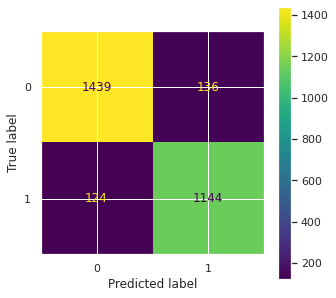

In [37]:
sns.set(rc={'figure.figsize':(5,5)})
display_metrics(y_test, y_pred)

# Random Forest

In [38]:
#se crea el modelo de random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
random_forest = RandomForestClassifier(n_estimators = 500, criterion='entropy', max_depth=None)
# Se entrena el modelo
random_forest.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=500)

In [39]:
#Se hace la predeccion con el dataset de test
y_pred_test_rf = random_forest.predict(X_test) 

Recall: 0.915902809073156
Precision: 0.9144397874410597
Accuracy: 0.915933872669715
f1_score: 0.9150985396329558


All metrics:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1575
           1       0.90      0.92      0.91      1268

    accuracy                           0.92      2843
   macro avg       0.91      0.92      0.92      2843
weighted avg       0.92      0.92      0.92      2843





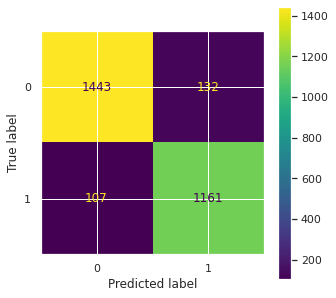

In [40]:
# Elaborar una matriz de confusión para random forest
sns.set(rc={'figure.figsize':(5,5)})
display_metrics(y_test, y_pred_test_rf)

# Feed-Foward Neural Network

In [41]:
early = callbacks.EarlyStopping(monitor='val_loss',patience=10) # Callback para detener modelo
# Arquitectura
modelFF = models.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
modelFF.compile(optimizer='Adam',
loss='binary_crossentropy',
metrics=['accuracy'])
historyFF = modelFF.fit(X_train, y_train, epochs=100, batch_size=64 , validation_data=(X_val, y_val), callbacks=[early])
modelFF.summary()

Epoch 1/100
356/356 [==============================] - 4s 5ms/step - loss: 0.3573 - accuracy: 0.8479 - val_loss: 3358467.7500 - val_accuracy: 0.4595
Epoch 2/100
356/356 [==============================] - 1s 4ms/step - loss: 0.2758 - accuracy: 0.8866 - val_loss: 6015130.0000 - val_accuracy: 0.4251
Epoch 3/100
356/356 [==============================] - 1s 4ms/step - loss: 0.2312 - accuracy: 0.9067 - val_loss: 3966917.0000 - val_accuracy: 0.4595
Epoch 4/100
356/356 [==============================] - 1s 4ms/step - loss: 0.1983 - accuracy: 0.9202 - val_loss: 4237560.5000 - val_accuracy: 0.4483
Epoch 5/100
356/356 [==============================] - 1s 4ms/step - loss: 0.1726 - accuracy: 0.9317 - val_loss: 9164725.0000 - val_accuracy: 0.4490
Epoch 6/100
356/356 [==============================] - 1s 4ms/step - loss: 0.1480 - accuracy: 0.9423 - val_loss: 17538378.0000 - val_accuracy: 0.4472
Epoch 7/100
356/356 [==============================] - 1s 4ms/step - loss: 0.1251 - accuracy: 0.9494 - va

In [42]:
y_predNN = modelFF.predict(X_test) #Etiquwtas de predicción para los datos de test
for i in range(0,len(y_predNN)):
  if (y_predNN[i]>=0.5):
    y_predNN[i]=1
  else:
    y_predNN[i]=0

89/89 [==============================] - 0s 2ms/step


Recall: 0.9144792449051125
Precision: 0.9130212309457875
Accuracy: 0.914526908195568
f1_score: 0.9136775946895744


All metrics:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1575
           1       0.90      0.91      0.91      1268

    accuracy                           0.91      2843
   macro avg       0.91      0.91      0.91      2843
weighted avg       0.91      0.91      0.91      2843





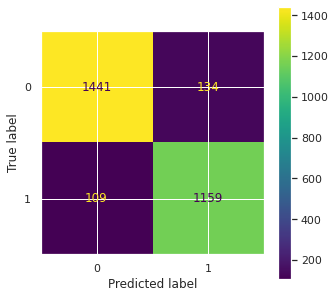

In [43]:
display_metrics(y_test, y_predNN) #Métricas

# Comparacion entre modelos

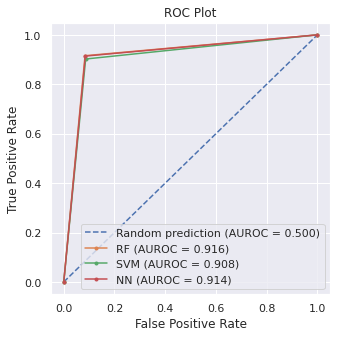

In [44]:
y_pred_test_svm=y_pred
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


r_probs = [0 for _ in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs) 
rf_auc = roc_auc_score(y_test, y_pred_test_rf)
svm_auc=roc_auc_score(y_test,y_pred_test_svm)
NN_auc= roc_auc_score(y_test,y_predNN)
#lr_GNB_auc = roc_auc_score(y_train, y_pred_GNB_train)



r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_test_rf)
svm_fpr,svm_tpr, _ = roc_curve(y_test,y_pred_test_svm)
NN_fpr,NN_tpr, _ = roc_curve(y_test,y_predNN)
#lr_GNB_fpr, lr_GNB_tpr, _ = roc_curve(y_train, y_pred_GNB_train)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (AUROC = %0.3f)' % rf_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(NN_fpr, NN_tpr, marker='.', label='NN (AUROC = %0.3f)' % NN_auc)
#plt.plot(lr_GNB_fpr, lr_GNB_tpr, marker='.', label='GNB (AUROC = %0.3f)' % lr_GNB_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [45]:
pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.2 MB/s 
     |████████████████████████████████| 278 kB 77.7 MB/s 
     |████████████████████████████████| 2.3 MB 57.4 MB/s 
     |████████████████████████████████| 55 kB 4.6 MB/s 
     |████████████████████████████████| 54 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 213 kB 62.0 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 106 kB 66.9 MB/s 
     |████████████████████████████████| 84 kB 5.0 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 80 kB 10.8 MB/s 
     |████████████████████████████████| 68 kB 8.5 MB/s 
     |████████████████████████████████| 68 kB 8.0 MB/s 
     |████████████████████████████████| 68 kB 8.7 MB/s 
     |████████████████████████████████| 68 kB 8.5 

# Despliegue del modelo

In [52]:
import gradio as gr

def greet(molecule):
    valores=np.fromstring(molecule, sep=",")
    arrr=np.array([valores])
    res=random_forest.predict(arrr)
    cadena=np.array2string(res, separator=',')
    c=cadena[1:-1]
    if c == '0':
      res="inactive"
    else:
      res="active"
    return res

demo = gr.Interface(fn=greet, inputs="text", outputs="text")

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>